In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import datetime
from math import floor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle
from shutil import copyfile
import matplotlib.pyplot as plt


In [3]:
import sys
import os
import tkinter as tk
from tkinter import filedialog

# Get path of common model code and add it to the python path variable
curr_dir = !echo %cd% 

init_common_dir = curr_dir[0]
common_model_dir = filedialog.askdirectory(initialdir = init_common_dir,
                                         title = "Choose current the Common_Model_Code directory...")

sys.path.insert(0, common_model_dir)
from class_feature_selection import perform_feat_sel_models
from class_model_creation import model_data, perform_grid_search, create_smote_data, create_under_data



In [4]:
import warnings
warnings.filterwarnings("ignore")

pd.options.mode.chained_assignment = None


User input variables

In [5]:
# Get files needed
train_data_file = filedialog.askopenfilename(initialdir = \
                                             'U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Phone_Disconnect_Model\\',
                                         title = "Choose training data file...")
train_target_file = filedialog.askopenfilename(title = "Choose training target file...")
test_data_file = filedialog.askopenfilename(title = "Choose testing data file...")
test_target_file = filedialog.askopenfilename(title = "Choose testing target file...")

init_save_path = 'U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Phone_Disconnect_Model\\'
base_path = filedialog.askdirectory(initialdir = init_save_path,
                                         title = "Choose base save directory...")
base_path = base_path.replace("/", "\\")
base_path += "\\"


Assign file path variables

In [6]:
model_base_name = 'Optimal_LDA_Model_Precision'


Assign date and time to variable

In [7]:
current_time = datetime.datetime.now()
start_time_str = current_time.strftime("%Y-%m-%d")

Assign model and data paths

In [8]:
model_path = base_path + 'Model\\'

if not os.path.exists(model_path):
    os.mkdir(model_path)
    
model_res_path = model_path + start_time_str + '_' + model_base_name + '\\'

if not os.path.exists(model_res_path):
    os.mkdir(model_res_path)

Import Training Data

In [9]:
train_data_orig = pd.read_csv(train_data_file, delimiter=",", index_col = 0, header = 0)
train_target_orig = pd.read_csv(train_target_file, delimiter=",", index_col = 0, header = 0)

In [10]:
train_data_orig.shape

(18360, 341)

In [11]:
train_target_orig.shape

(18360, 1)

Import Testing Data

In [12]:
test_data = pd.read_csv(test_data_file, delimiter=",", index_col = 0, header = 0)
test_target = pd.read_csv(test_target_file, delimiter=",", index_col = 0, header = 0)

In [13]:
test_data.shape

(4590, 341)

In [14]:
test_target.shape

(4590, 1)

Check training and testing variables

In [15]:
num_rows = train_data_orig.shape[0] + 1
num_cols = train_data_orig.shape[1] + 1
pd.set_option('max_rows', num_rows)
pd.set_option('max_columns', num_cols)
np.set_printoptions(threshold=np.inf)

Assign variables needed for feature selection

In [16]:
score_thresh = 0.05
var_buffer_perc = 0.01
perc_vals = list(range(5, 105, 5))
thresh_vals = list(np.arange(0.1, 1.1, 0.1))
step_val = 0.1

num_features = train_data_orig.shape[1]
num_feat_steps = 20
k_step_sz = num_features / num_feat_steps
k_max = num_features + k_step_sz
k_vals = list(np.arange(1, k_max, k_step_sz).astype('int'))

Assign variables needed for modeling

In [17]:
rand_st = 45
cv_num = 5
cv_scorers = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
metric_fcns = ['accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score', 'f1_score']
main_scorer = 'precision'


Assign variables needed for grid search

In [18]:
solver = ['svd', 'lsqr', 'eigen']
tol = [0.0001, 0.001, 0.0005]

grid_params = {
    'solver': solver,
    'tol': tol
}


Create SMOTE oversampled training data

In [19]:
train_data, train_target = create_smote_data(train_data_orig, train_target_orig, rand_st, 0.3)

Number of Original Target 0 Value: 17098
Number of Original Target 1 Value: 1262


Number of SMOTE Target 0 Value: 17098
Number of SMOTE Target 1 Value: 5129


Create base model object (all parameters specified are default values)

In [20]:
base_model = LinearDiscriminantAnalysis(solver = 'svd', tol = 0.0001)

Create base model with all features

*****************************************************************************************
************************* Training Set Cross-Validation Results *************************
*****************************************************************************************


CV  test_accuracy : 0.7746884528968784 +/- 0.004437569143242729
CV  test_f1 : 0.31047837699255254 +/- 0.033547804659013705
CV  test_precision : 0.5280952410436013 +/- 0.021805810306092157
CV  test_recall : 0.22012228402985784 +/- 0.031529751397368
CV  test_roc_auc : 0.762455444103092 +/- 0.032711869137641604
CV Runtime: 6.209454536437988


*****************************************************************************************
******************************* Full Training Set Results *******************************
*****************************************************************************************




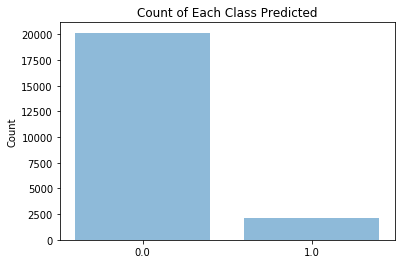

Number of 0 predictions: 20153
Number of 1 predictions: 2074
Percent of predictions with value 0: 0.9066900616367481
Percent of predictions with value 1: 0.0933099383632519


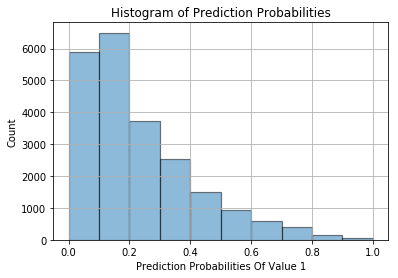



------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


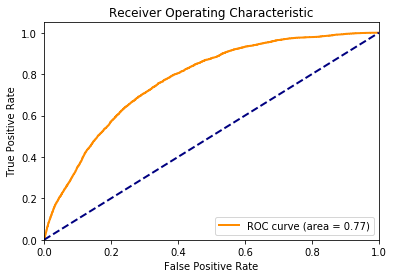



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.7796823682908175
f1_score : 0.32014438428432596
precision_score : 0.555930568948891
recall_score : 0.22480015597582376
roc_auc_score : 0.5854671033709976


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87     17098
         1.0       0.56      0.22      0.32      5129

    accuracy                           0.78     22227
   macro avg       0.68      0.59      0.59     22227
weighted avg       0.75      0.78      0.74     22227



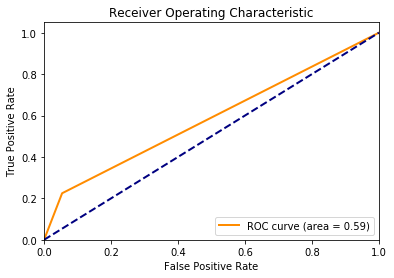

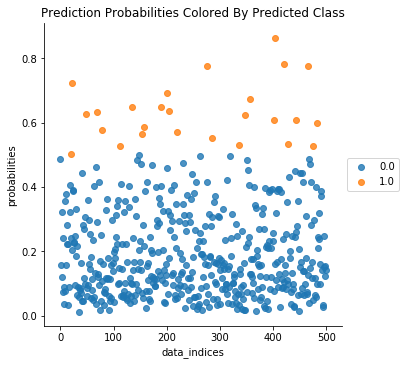

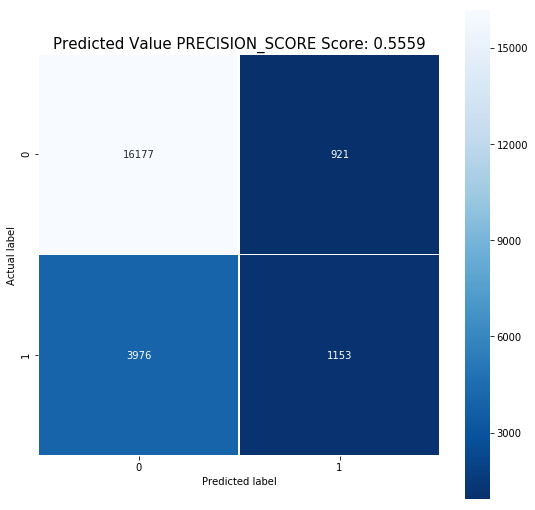



*****************************************************************************************
********************************** Testing Set Results **********************************
*****************************************************************************************


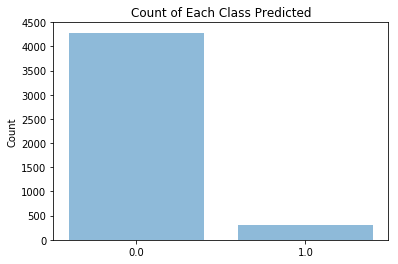

Number of 0 predictions: 4282
Number of 1 predictions: 308
Percent of predictions with value 0: 0.9328976034858388
Percent of predictions with value 1: 0.06710239651416122


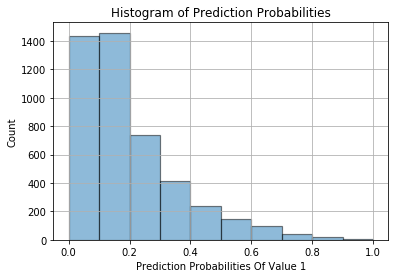



------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


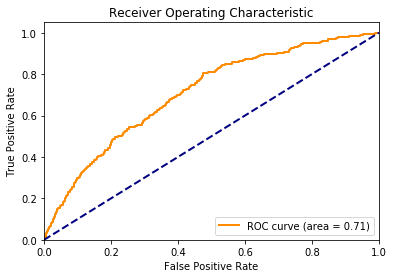



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.8891067538126362
f1_score : 0.18298555377207062
precision_score : 0.18506493506493507
recall_score : 0.18095238095238095
roc_auc_score : 0.5611194653299917


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      4275
         1.0       0.19      0.18      0.18       315

    accuracy                           0.89      4590
   macro avg       0.56      0.56      0.56      4590
weighted avg       0.89      0.89      0.89      4590



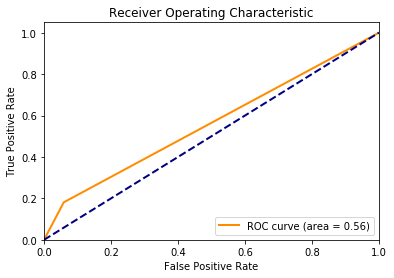

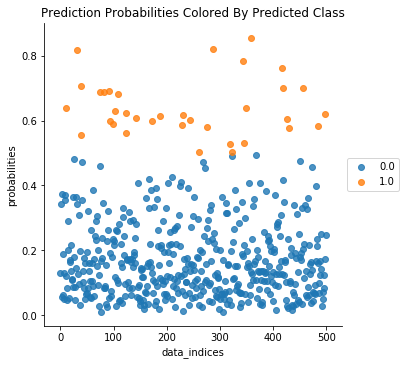

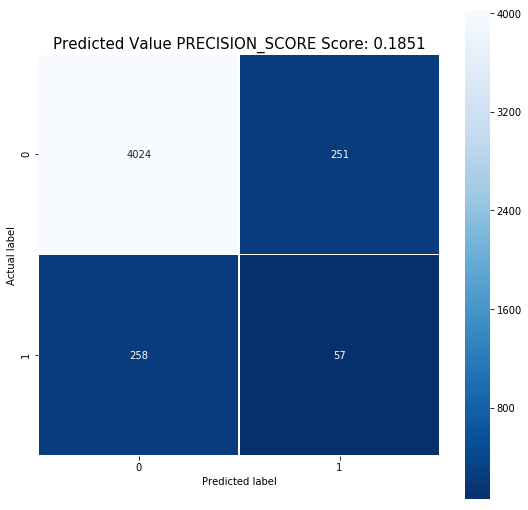

In [21]:
base_fit_model, base_pred_dict, base_score_dict = model_data(train_data, train_target, test_data, test_target, base_model,  
               cv_scorers, cv_num, metric_fcns, main_scorer)

Perform feature selection

-- Low Variance Filter Feature Selection --
Thresholds Selected: 0.1
Selected Model CV Mean  test_accuracy  Score: 0.7670402691298582
Selected Model CV  test_accuracy  Deviation: 0.004392212289187832
Selected Model CV Mean  test_f1  Score: 0.1613600894943063
Selected Model CV  test_f1  Deviation: 0.04605008159938321
Selected Model CV Mean  test_precision  Score: 0.4752057543332408
Selected Model CV  test_precision  Deviation: 0.05064356601260908
Selected Model CV Mean  test_recall  Score: 0.0974831930775448
Selected Model CV  test_recall  Deviation: 0.032669637813828395
Selected Model CV Mean  test_roc_auc  Score: 0.6968571142302181
Selected Model CV  test_roc_auc  Deviation: 0.03239047652979989
Number of Original Features: 341
Number of Selected Features: 28
Selected Features:
['pcp', 'phone_age_yrs', 'yop_yrs', 'doctor_age_yrs', 'num_oldphones', 'ent_comm_src_cat_code_PHNSURV', 'ent_comm_src_cat_code_PPA', 'ent_comm_src_cat_code_WEBVRTR', 'ppd_address_type_1', 'ppd_address_type_2', '

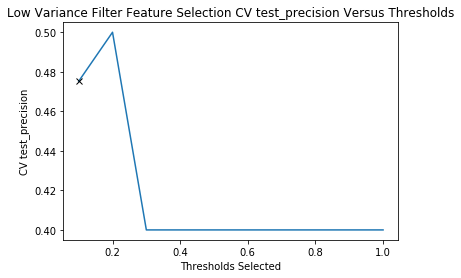



-- Model Wrapper Feature Selection --
Selected Model CV Mean  test_accuracy  Score: 0.7731138824752625
Selected Model CV  test_accuracy  Deviation: 0.004536852844429359
Selected Model CV Mean  test_f1  Score: 0.23900172137906656
Selected Model CV  test_f1  Deviation: 0.04471853929567996
Selected Model CV Mean  test_precision  Score: 0.5305807102573576
Selected Model CV  test_precision  Deviation: 0.040648161983058075
Selected Model CV Mean  test_recall  Score: 0.15500137878571768
Selected Model CV  test_recall  Deviation: 0.038758084455026695
Selected Model CV Mean  test_roc_auc  Score: 0.7106430652798189
Selected Model CV  test_roc_auc  Deviation: 0.047619424644196245
Number of Original Features: 341
Number of Selected Features: 132
Selected Features:
['lic_state_match', 'ent_comm_src_cat_code_APPEND', 'ent_comm_src_cat_code_CME-REG', 'ent_comm_src_cat_code_E-MAIL', 'ent_comm_src_cat_code_FEDERATION', 'ent_comm_src_cat_code_MBSHP-MAIL', 'ent_comm_src_cat_code_MBSHP-PHON', 'ent_comm_

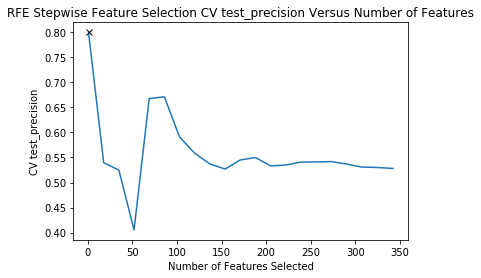



-- Univariate Chi-Sq Feature Selection --
Percent of Features Selected: 5
Selected Model CV Mean  test_accuracy  Score: 0.7713595471841852
Selected Model CV  test_accuracy  Deviation: 0.005405033858109285
Selected Model CV Mean  test_f1  Score: 0.20900730340248191
Selected Model CV  test_f1  Deviation: 0.03851328471833839
Selected Model CV Mean  test_precision  Score: 0.5185852367514532
Selected Model CV  test_precision  Deviation: 0.049719312189886775
Selected Model CV Mean  test_recall  Score: 0.1312141872295916
Selected Model CV  test_recall  Deviation: 0.03030601234179323
Selected Model CV Mean  test_roc_auc  Score: 0.7058807805758802
Selected Model CV  test_roc_auc  Deviation: 0.036204411147349784
Number of Original Features: 341
Number of Selected Features: 17
Selected Features:
['yop_yrs', 'doctor_age_yrs', 'ent_comm_src_cat_code_APPEND', 'ent_comm_src_cat_code_OTHER', 'ent_comm_src_cat_code_PHNSURV', 'ent_comm_src_cat_code_PHONE-CALL', 'ent_comm_src_cat_code_WEBVRTR', 'ppd_re

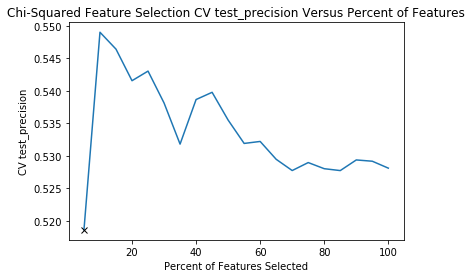



-- Mutual Information Feature Selection --
Percent of Features Selected: 5
Selected Model CV Mean  test_accuracy  Score: 0.7694694492788974
Selected Model CV  test_accuracy  Deviation: 0.0016575316050715413
Selected Model CV Mean  test_f1  Score: 0.03386791258236721
Selected Model CV  test_f1  Deviation: 0.018714685706900915
Selected Model CV Mean  test_precision  Score: 0.5116588368863394
Selected Model CV  test_precision  Deviation: 0.095916861205099
Selected Model CV Mean  test_recall  Score: 0.017546902486568726
Selected Model CV  test_recall  Deviation: 0.009937229357402315
Selected Model CV Mean  test_roc_auc  Score: 0.6234704353444974
Selected Model CV  test_roc_auc  Deviation: 0.025640005494292902
Number of Original Features: 341
Number of Selected Features: 17
Selected Features:
['pcp', 'phone_age_yrs', 'yop_yrs', 'doctor_age_yrs', 'num_oldphones', 'ppd_address_type_1', 'ppd_address_type_2', 'ppd_region_1', 'ppd_region_2', 'ppd_region_3', 'ppd_region_4', 'ppd_division_9', 'p

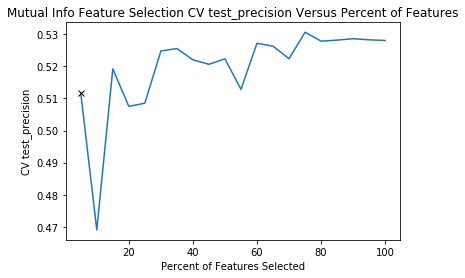



-- Anova F Statistic Feature Selection --
Percent of Features Selected: 5
Selected Model CV Mean  test_accuracy  Score: 0.7709992682549748
Selected Model CV  test_accuracy  Deviation: 0.0037765042509021554
Selected Model CV Mean  test_f1  Score: 0.2302314867294694
Selected Model CV  test_f1  Deviation: 0.030125327951700746
Selected Model CV Mean  test_precision  Score: 0.5126134634562383
Selected Model CV  test_precision  Deviation: 0.026169581263357104
Selected Model CV Mean  test_recall  Score: 0.14856634811962155
Selected Model CV  test_recall  Deviation: 0.02336301699282931
Selected Model CV Mean  test_roc_auc  Score: 0.713147544269206
Selected Model CV  test_roc_auc  Deviation: 0.037346183306415884
Number of Original Features: 341
Number of Selected Features: 17
Selected Features:
['lic_state_match', 'yop_yrs', 'doctor_age_yrs', 'ent_comm_src_cat_code_APPEND', 'ent_comm_src_cat_code_OTHER', 'ent_comm_src_cat_code_PHNSURV', 'ent_comm_src_cat_code_WEBVRTR', 'ppd_address_type_1', '

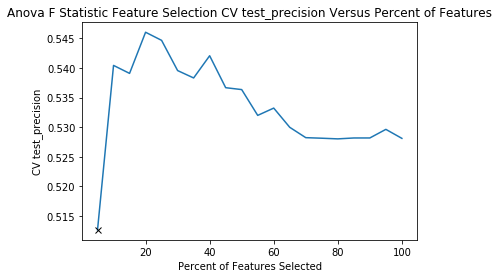



Scores Per Feature Selection Type:
  fs_type  opt_score  num_vars
0     lvf   0.475206        28
0    wrap   0.530581       132
0    step   0.800000         1
0   chisq   0.518585        17
0  mutinf   0.511659        17
0  anovaf   0.512613        17


Optimal Feature Selection Choice Based On  precision :
FS Type:  anovaf
FS Score:  0.5126134634562383




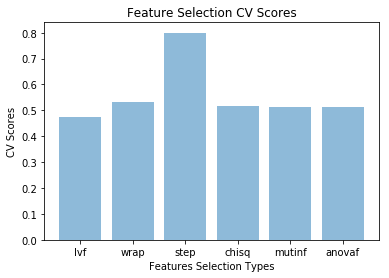

In [22]:
results_dict, opt_fs_dict, all_scores_df = perform_feat_sel_models(train_data, train_target, test_data, 
                            base_model, perc_vals, k_vals, thresh_vals, 
                            cv_num, cv_scorers, main_scorer, score_thresh, var_buffer_perc, step_val)

Extract feature selection training and testing datasets

In [23]:
fs_train_data = opt_fs_dict['train_data']
fs_test_data = opt_fs_dict['test_data']

Create model object for grid search optimization

In [24]:
grid_model = LinearDiscriminantAnalysis()


Perform grid search on chosen feature selection dataset

In [25]:
opt_model = perform_grid_search(grid_model, fs_train_data, train_target, grid_params, main_scorer, cv_num)

*** Grid Search ***
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Grid Search Runtime: 2.355710983276367


Grid Search Optimal Parameters: {'solver': 'svd', 'tol': 0.0001}
Grid Search Optimal Parameter Score: 0.5126131137174197


Optimal Model Parameter Settings:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)




[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.2s finished


Evaluate performance of optimal model chosen

*****************************************************************************************
************************* Training Set Cross-Validation Results *************************
*****************************************************************************************


CV  test_accuracy : 0.7709992682549748 +/- 0.0037765042509021554
CV  test_f1 : 0.2302314867294694 +/- 0.030125327951700746
CV  test_precision : 0.5126134634562383 +/- 0.026169581263357104
CV  test_recall : 0.14856634811962155 +/- 0.02336301699282931
CV  test_roc_auc : 0.713147544269206 +/- 0.037346183306415884
CV Runtime: 0.37400197982788086


*****************************************************************************************
******************************* Full Training Set Results *******************************
*****************************************************************************************




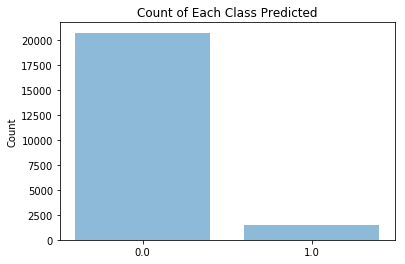

Number of 0 predictions: 20749
Number of 1 predictions: 1478
Percent of predictions with value 0: 0.9335042965762361
Percent of predictions with value 1: 0.06649570342376389


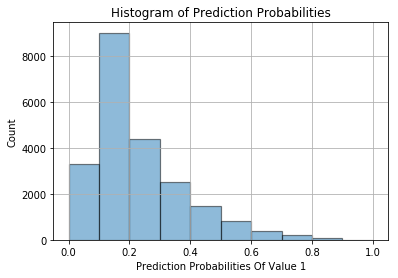



------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


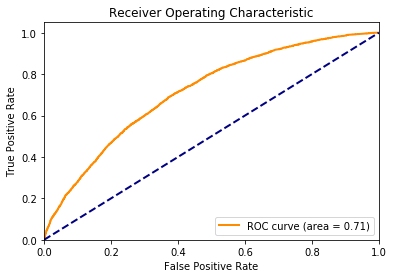



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.7717640707247941
f1_score : 0.23217799303768727
precision_score : 0.5189445196211097
recall_score : 0.14954182101774224
roc_auc_score : 0.5539790050228492


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87     17098
         1.0       0.52      0.15      0.23      5129

    accuracy                           0.77     22227
   macro avg       0.65      0.55      0.55     22227
weighted avg       0.73      0.77      0.72     22227



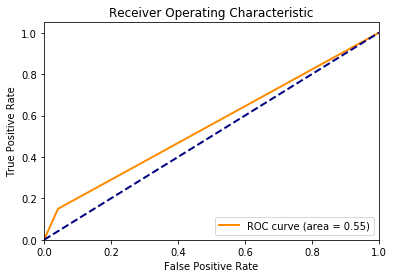

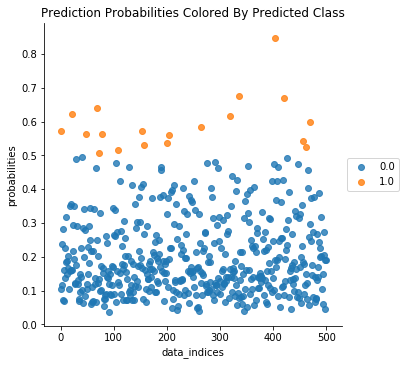

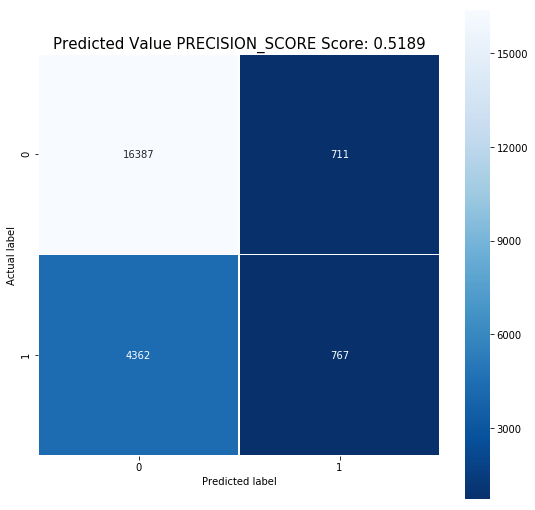



*****************************************************************************************
********************************** Testing Set Results **********************************
*****************************************************************************************


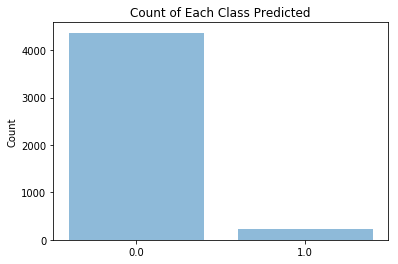

Number of 0 predictions: 4369
Number of 1 predictions: 221
Percent of predictions with value 0: 0.9518518518518518
Percent of predictions with value 1: 0.04814814814814815


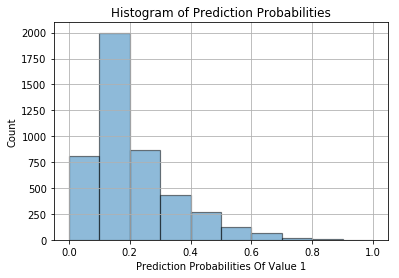



------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


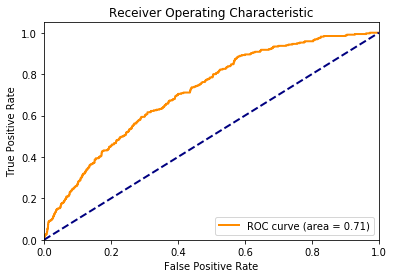



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.9037037037037037
f1_score : 0.17537313432835822
precision_score : 0.21266968325791855
recall_score : 0.1492063492063492
roc_auc_score : 0.5542522974101921


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      4275
         1.0       0.21      0.15      0.18       315

    accuracy                           0.90      4590
   macro avg       0.58      0.55      0.56      4590
weighted avg       0.89      0.90      0.90      4590



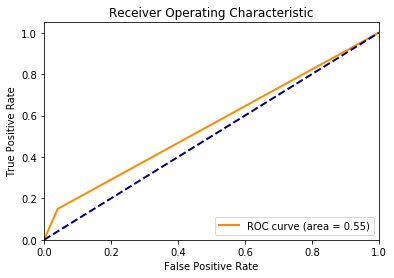

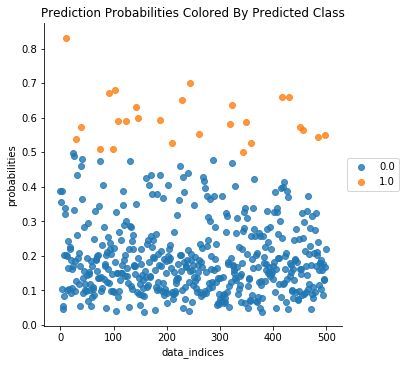

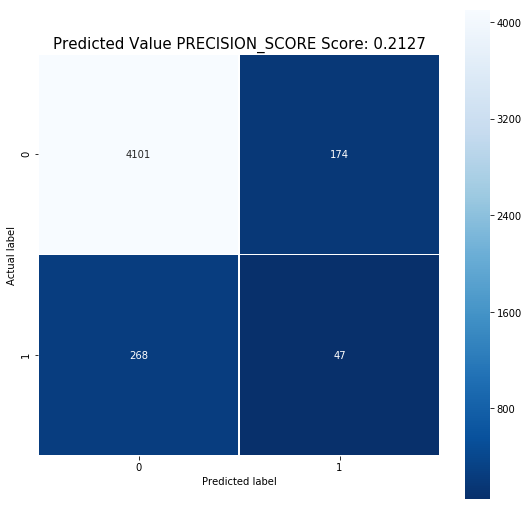

In [26]:
opt_fit_model, opt_pred_dict, opt_score_dict = model_data(fs_train_data, train_target, fs_test_data, test_target, opt_model,
               cv_scorers, cv_num, metric_fcns, main_scorer)

View model feature importance values

   lic_state_match   yop_yrs  doctor_age_yrs  ent_comm_src_cat_code_APPEND  \
0        -0.887331  0.005088        0.029126                      1.484316   

   ent_comm_src_cat_code_OTHER  ent_comm_src_cat_code_PHNSURV  \
0                     1.166382                      -0.485363   

   ent_comm_src_cat_code_WEBVRTR  ppd_address_type_1  ppd_address_type_2  \
0                       0.352151           -0.465972           -0.127851   

   ppd_region_4  ppd_division_9  ppd_msa_population_size_A  ppd_pe_cd_030  \
0      0.375675       -0.214604                   0.245028       0.096852   

   ppd_pe_cd_110  ppd_prim_spec_cd_AN  ppd_polo_state_CA  ppd_polo_state_PR  
0       1.275658             0.862897           0.337196           1.493405  


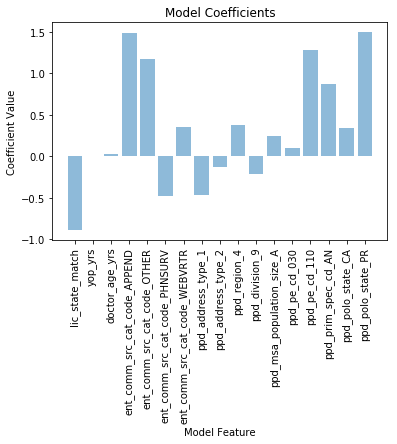

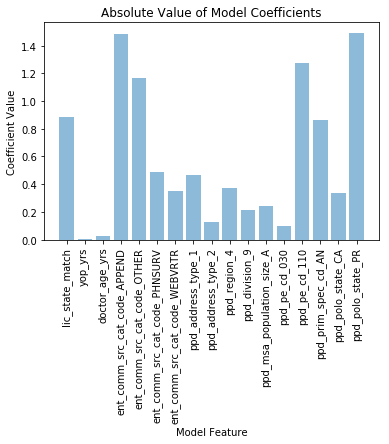

In [27]:
fit_cols = fs_train_data.columns.values

model_coefs = opt_fit_model.coef_

coef_df = pd.DataFrame(model_coefs, columns = fit_cols)
print(coef_df)

plt.bar(list(fit_cols), model_coefs.tolist()[0], align = 'center', alpha = 0.5)
plt.xticks(rotation = 90)
plt.ylabel('Coefficient Value') 
plt.xlabel('Model Feature')
plt.title('Model Coefficients')
plt.show()

plt.bar(list(fit_cols), abs(model_coefs).tolist()[0], align = 'center', alpha = 0.5)
plt.xticks(rotation = 90)
plt.ylabel('Coefficient Value') 
plt.xlabel('Model Feature')
plt.title('Absolute Value of Model Coefficients')
plt.show()


Save model for future use

In [30]:
model_filename = model_path + start_time_str + '_' + model_base_name + '.sav'
pickle.dump(opt_fit_model, open(model_filename, 'wb'))

Save list of features used

In [31]:
var_filename = model_path + start_time_str + '_' + model_base_name + '_FeatureList.sav'
pickle.dump(fit_cols, open(var_filename, 'wb'))

Save Results

In [32]:
pred_filename = model_res_path + start_time_str + '_' + model_base_name + '_Preds.sav'
pickle.dump(opt_pred_dict, open(pred_filename, 'wb'))

In [33]:
scores_filename = model_res_path + start_time_str + '_' + model_base_name + '_Scores.sav'
pickle.dump(opt_score_dict, open(scores_filename, 'wb'))

In [34]:
end_time = datetime.datetime.now()
elapsed_time = end_time - current_time
print('Elapsed time (sec): {}'.format(elapsed_time))
print('Elapsed time (min): {}'.format((elapsed_time / 60)))
print('Elapsed time (hrs): {}'.format(((elapsed_time / 60) / 60)))

Elapsed time (sec): 1:08:44.678239
Elapsed time (min): 0:01:08.744637
Elapsed time (hrs): 0:00:01.145744
